In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

C:\Users\Derm\anaconda3\envs\tf23\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Derm\anaconda3\envs\tf23\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Derm\anaconda3\envs\tf23\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [126]:
# 100 trials on same set of 2 frames (sensor noise re-applied for each trial)
# Ground truth = [0.5, 0.5, 0., 0.0, 0.0, -0.05]
# fn1 = "MC_results/scene1_ICET_estimates_v4.npy" #with extended surface mitigation
# fn2 = "MC_results/scene1_ICET_pred_stds_v4.npy"
fn1 = "MC_results/scene1_ICET_estimates_NM_v3.npy" #no extended surface mitigation
fn2 = "MC_results/scene1_ICET_pred_stds_NM_v3.npy"

est = np.load(fn1)
pred_stds = np.load(fn2)

print(np.mean(pred_stds, axis = 0)[:3])
print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))

# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

[0.00012259 0.00052186 0.00014726]
[0.00126903 0.0019939  0.00101666]


In [133]:
#calc mean and std
mean = np.mean(est, axis = 0)
print(mean, "\n")
std = np.std(est, axis = 0)
std[3:] = np.rad2deg(std[3:]) #convert angles to degrees
std += np.abs(mean) #add in any net offset

print(std)

[-1.46775309e-05  1.52443196e-03  2.12384039e-05  3.64253225e-07
  2.66935988e-06 -4.55984953e-06] 

[0.0001582  0.00978552 0.00022225 0.00252085 0.00394823 0.00299933]


<IPython.core.display.Javascript object>


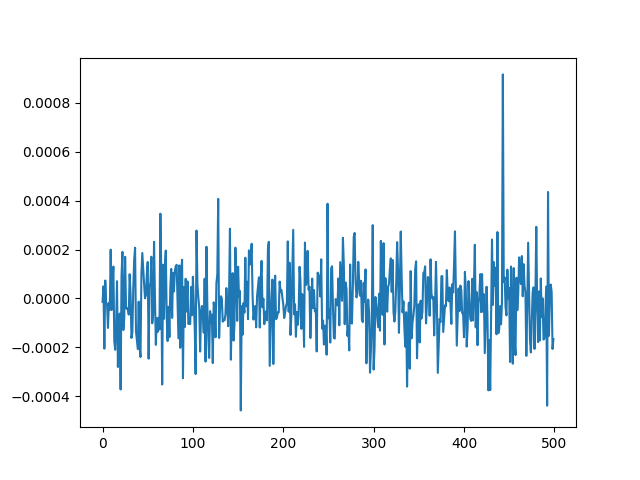

In [132]:
#for debug - plot pred_stds to make sure we don't have any outlier trials
fig, ax = plt.subplots()

# ax.plot(pred_stds[:,0])
ax.plot(est[:,0]) 

In [22]:
bad = np.where(est[:,0] > -0.35)
print(bad)
print(est)

(array([], dtype=int64),)
[[-4.99938101e-01 -5.00305176e-01 -1.65290185e-04  2.75196508e-05
   1.25635415e-05  7.65942968e-05]
 [-4.99728382e-01 -4.97907460e-01 -1.25501887e-04 -3.71728092e-05
   7.37309456e-05  4.57745045e-05]
 [-4.99776870e-01 -4.98951703e-01  4.65149060e-05  1.69854611e-05
  -6.65150583e-06  1.17197633e-05]
 [-4.99986887e-01 -4.98261273e-01 -1.59181654e-05  3.18428501e-05
   2.14129686e-05  7.75121152e-05]
 [-4.99901742e-01 -4.98942018e-01 -2.02326977e-04 -1.60699710e-05
   1.33067369e-05  3.16868536e-05]
 [-4.99732196e-01 -4.99435604e-01 -1.17209740e-04 -1.46878883e-05
   4.59887087e-05  3.74391675e-05]
 [-5.00184834e-01 -5.00155747e-01 -3.18739563e-04 -6.70552254e-07
  -3.66196036e-06  2.67699361e-05]
 [-4.99889851e-01 -4.98437196e-01  9.46838409e-05  1.29002146e-05
   3.43848951e-05 -5.45382500e-06]
 [-4.99958575e-01 -4.97368336e-01  7.79116526e-05  1.26101077e-05
  -8.08015466e-06  5.48437238e-05]
 [-4.99819309e-01  1.75655007e-01 -6.21210784e-05  3.38144600e-05